# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

**Шаги для выбора локации:**

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

**Условия задачи:**

    - для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
    - при разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
    - бюджет на разработку скважин в регионе — 10 млрд рублей.
    - при нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
    - после оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.
    
Данные синтетические: детали контрактов и характеристики месторождений не разглашаются.


*Для того, чтобы решить поставленные задачи в ходе выполнения проекта будет сделано следующее:*

1) изучены и подготовлены данные для дальнейшего обучения модели

2) обучение модели методом линейной регресии для каждого региона

3) подготовим данные для расчета прибыли по каждому региону

4) напишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели

5) расчитаем риски и прибыль для каждого региона с использованием метода bootstrap

## Загрузка и подготовка данных

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Изучим более подробно три таблицы по трем регионам, в которых предполагается разработка свкажин.

In [2]:
# прочитаем таблицы по всем регионам
data_1 = pd.read_csv('..._0.csv')
data_2 = pd.read_csv('..._1.csv')
data_3 = pd.read_csv('..._2.csv')
print('Первый регион', '_' * 35)
print(data_1.head(5))
print()
print('Второй регион', '_' * 35)
print(data_2.head(5))
print()
print('Третий регион', '_' * 35)
print(data_3.head(5))

Первый регион ___________________________________
      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647

Второй регион ___________________________________
      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305

Третий регион ___________________________________
      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -

In [3]:
# получим общую информацию по регионам
print('Первый регион', '_' * 35)
print(data_1.info())
print()
print('Второй регион', '_' * 35)
print(data_2.info())
print()
print('Третий регион', '_' * 35)
print(data_3.info())

Первый регион ___________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

Второй регион ___________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

Третий регион ______

In [4]:
# определеи размер таблицы
print('Первый регион')
print(data_1.shape)
print()
print('Второй регион')
print(data_2.shape)
print()
print('Третий регион')
print(data_3.shape)

Первый регион
(100000, 5)

Второй регион
(100000, 5)

Третий регион
(100000, 5)


In [5]:
# проверим наличие пропусков
print('Первый регион')
print(data_1.isna().sum())
print()
print('Второй регион')
print(data_2.isna().sum())
print()
print('Третий регион')
print(data_3.isna().sum())

Первый регион
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Второй регион
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Третий регион
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


In [6]:
# проверим наличие дубликатов
print('Первый регион')
print(data_1.duplicated().sum())
print()
print('Второй регион')
print(data_2.duplicated().sum())
print()
print('Третий регион')
print(data_3.duplicated().sum())

Первый регион
0

Второй регион
0

Третий регион
0


In [7]:
# посмотрим столбец f0
print('Первый регион')
print(data_1['f0'].describe())
print()
print('Второй регион')
print(data_2['f0'].describe())
print()
print('Третий регион')
print(data_3['f0'].describe())

Первый регион
count    100000.000000
mean          0.500419
std           0.871832
min          -1.408605
25%          -0.072580
50%           0.502360
75%           1.073581
max           2.362331
Name: f0, dtype: float64

Второй регион
count    100000.000000
mean          1.141296
std           8.965932
min         -31.609576
25%          -6.298551
50%           1.153055
75%           8.621015
max          29.421755
Name: f0, dtype: float64

Третий регион
count    100000.000000
mean          0.002023
std           1.732045
min          -8.760004
25%          -1.162288
50%           0.009424
75%           1.158535
max           7.238262
Name: f0, dtype: float64


In [8]:
# посмотрим столбец f1
print('Первый регион')
print(data_1['f1'].describe())
print()
print('Второй регион')
print(data_2['f1'].describe())
print()
print('Третий регион')
print(data_3['f1'].describe())

Первый регион
count    100000.000000
mean          0.250143
std           0.504433
min          -0.848218
25%          -0.200881
50%           0.250252
75%           0.700646
max           1.343769
Name: f1, dtype: float64

Второй регион
count    100000.000000
mean         -4.796579
std           5.119872
min         -26.358598
25%          -8.267985
50%          -4.813172
75%          -1.332816
max          18.734063
Name: f1, dtype: float64

Третий регион
count    100000.000000
mean         -0.002081
std           1.730417
min          -7.084020
25%          -1.174820
50%          -0.009482
75%           1.163678
max           7.844801
Name: f1, dtype: float64


In [9]:
# посмотрим столбец f2
print('Первый регион')
print(data_1['f2'].describe())
print()
print('Второй регион')
print(data_2['f2'].describe())
print()
print('Третий регион')
print(data_3['f2'].describe())

Первый регион
count    100000.000000
mean          2.502647
std           3.248248
min         -12.088328
25%           0.287748
50%           2.515969
75%           4.715088
max          16.003790
Name: f2, dtype: float64

Второй регион
count    100000.000000
mean          2.494541
std           1.703572
min          -0.018144
25%           1.000021
50%           2.011479
75%           3.999904
max           5.019721
Name: f2, dtype: float64

Третий регион
count    100000.000000
mean          2.495128
std           3.473445
min         -11.970335
25%           0.130359
50%           2.484236
75%           4.858794
max          16.739402
Name: f2, dtype: float64


In [10]:
# посмотрим столбец product
print('Первый регион')
print(data_1['product'].describe())
print()
print('Второй регион')
print(data_2['product'].describe())
print()
print('Третий регион')
print(data_3['product'].describe())

Первый регион
count    100000.000000
mean         92.500000
std          44.288691
min           0.000000
25%          56.497507
50%          91.849972
75%         128.564089
max         185.364347
Name: product, dtype: float64

Второй регион
count    100000.000000
mean         68.825000
std          45.944423
min           0.000000
25%          26.953261
50%          57.085625
75%         107.813044
max         137.945408
Name: product, dtype: float64

Третий регион
count    100000.000000
mean         95.000000
std          44.749921
min           0.000000
25%          59.450441
50%          94.925613
75%         130.595027
max         190.029838
Name: product, dtype: float64


После вывода данных по всем таблицам можно сделать следующий вывод:

1) в каждой таблице представлено 5 столбцов: 

    - id - идентификатор скважины
    - f0, f1, f2 - значимые признаки
    - product - объем запасов в скважине, тысячи тонн
    
2) в таблицах по 100000 строк

3) в таблицах нет пропусков, нет дубликатов

4) при просмотре каждого столбца не было выявлено каких-то необычных значений

Построи диаграммы и boxplot для каждого столбца, чтобы было наглядно видно распределение ведичин каждого столбца по каждому региону.

In [11]:
def show_hists(data, data_label, num_bins, log_scale=False):
    """
    Функция построения диграммы и boxplot для столбцов f0, f1, f2, product таблиц для трех регионов
    
    """
    sns.set()
    f, axes = plt.subplots(1, 2, figsize=(16, 4))
    axes[0].set_title(data_label + ' (Плотность распределения)', fontsize=18)
    axes[0].set_ylabel('плотность', fontsize=15)
    sns.distplot(data, bins=num_bins, ax=axes[0])
    axes[1].set_title(data_label + ' (Boxplot)', fontsize=18)
    sns.boxplot(data=data, ax=axes[1])
    plt.show()

In [12]:
def show_region(data, name):
    numerics = ['f0', 'f1', 'f2', 'product']
    for column in numerics:
        show_hists(data[column], name + ' ' + column, num_bins=20)

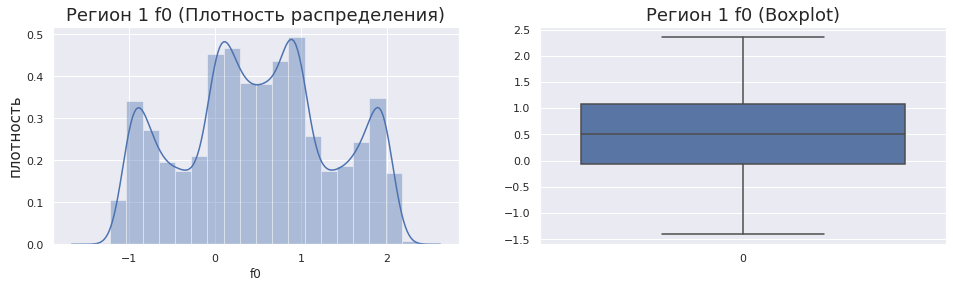

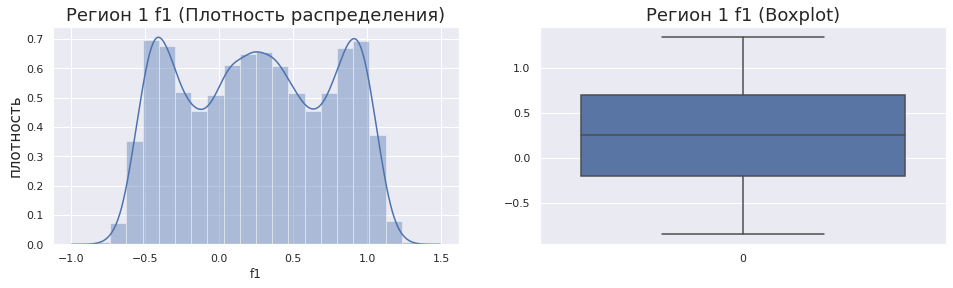

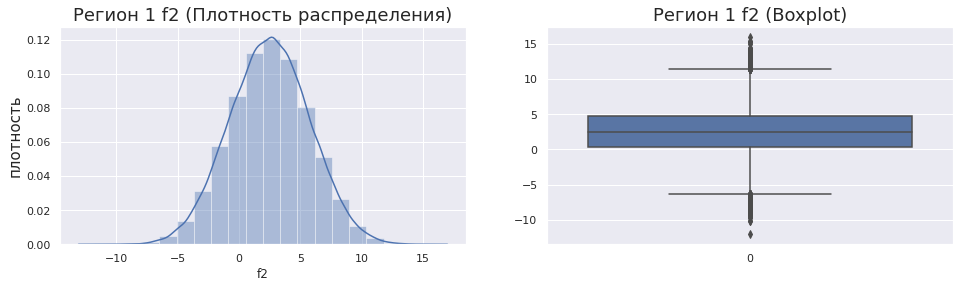

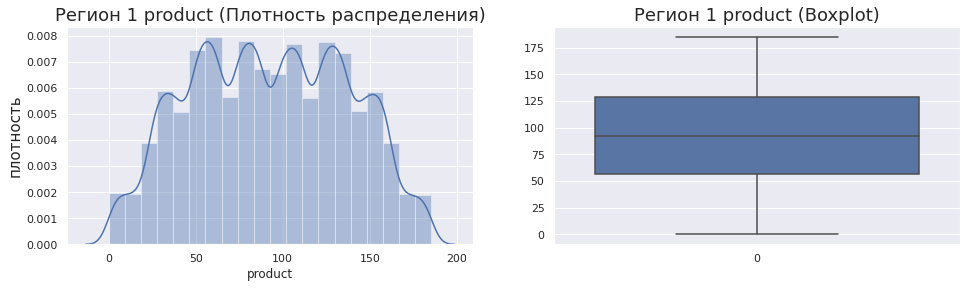

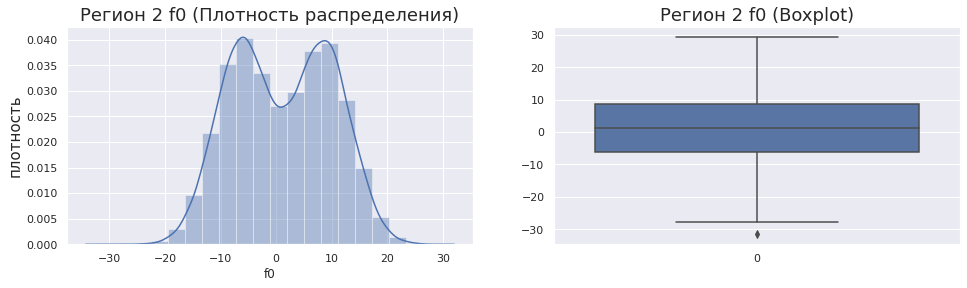

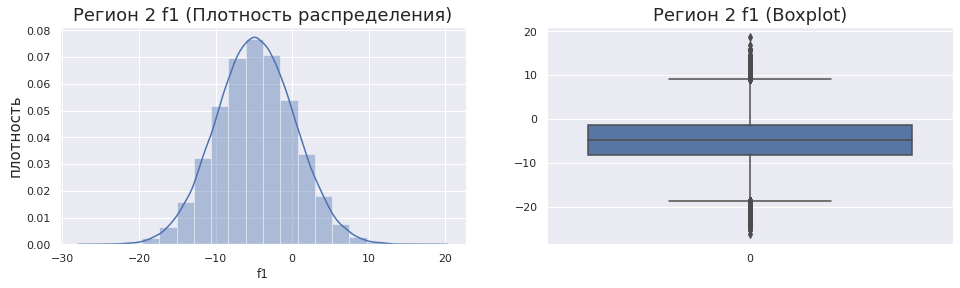

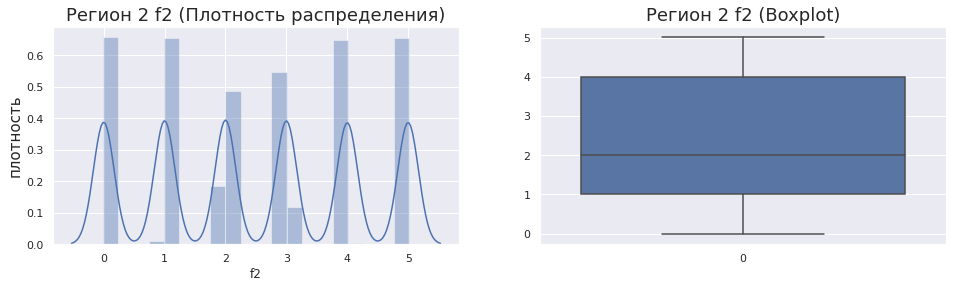

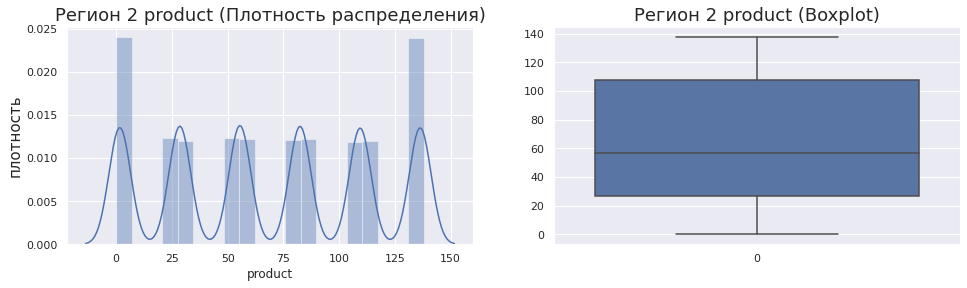

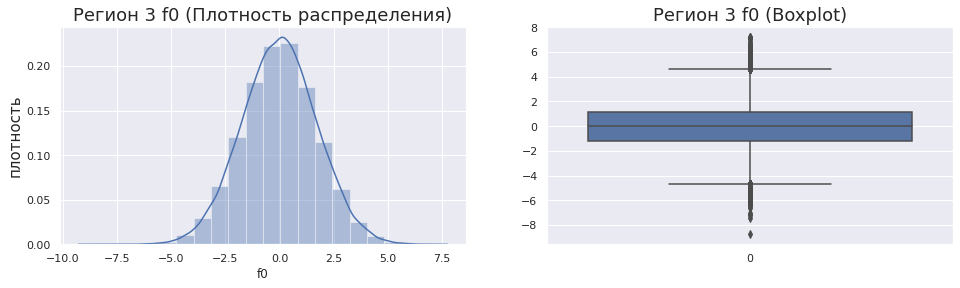

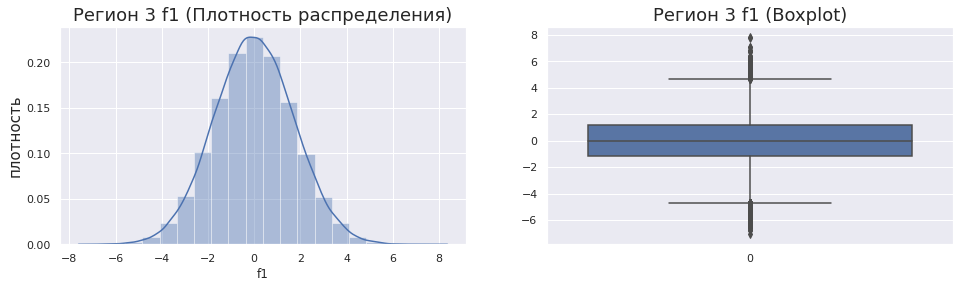

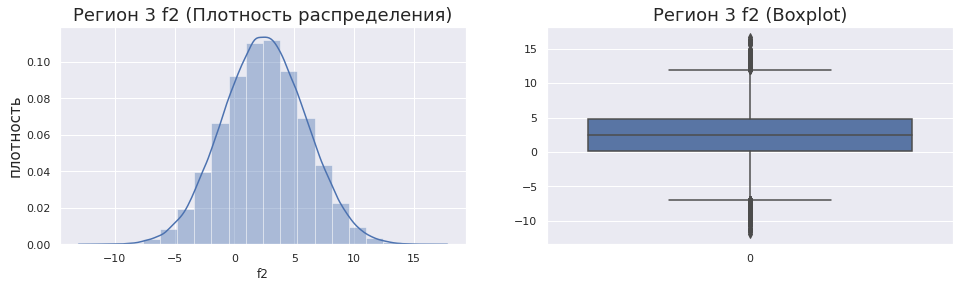

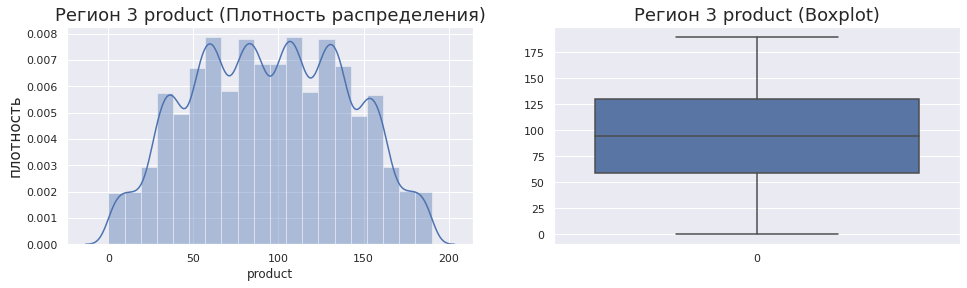

In [13]:
for data, name in [(data_1, 'Регион 1'), (data_2, 'Регион 2'), (data_3, 'Регион 3')]:
    show_region(data, name)

Исходя из построенных выше графиков видно:

1) распределения некоторых признаков отличаются от нормального, присутствуют небольшие выбросы. Но так как неизвестно, что означают сами признаки, сложно оценить адекватность распределений и выбросов

2) масштабы распределений признаков f0, f1, f2 не сильно отличаются друг от друга (меньше одного порядка), поэтому нет необходимости применять масштабирование

**Вывод:**

В ходе выполнения данного раздела:

1) данные были загружены и изучены:

    - данные соответсвуют описанию
    - нет пропусков и дубликатов
    - нет необычных значений в столбцах
    
2) распределения некоторых признаков отличаются от нормального, также присутсвуют выбросы. Мвсштабы признаков f0, f1, f2 не сильно отличаются друг от друга, поэтому нет необходимости применять масштабирование

## Обучение и проверка модели

В рамках данного раздела сделаем следующее:

    - разделим данные на обучающую и валидационные выборки
    - обучим модель методом линейной регресси и сделаем предсказания
    - сохраним предсказания и правильные ответы
    - определим средние запасы предсказываемого сырья и RMSE модели
    - проанализируем результаты
    
Указанные выше пункты реализуем в функции. Предварительно выделим целевой признак в выборке по каждому региону, а также удалим ненужный столбец с id скважин

In [14]:
# выделение целевого признака для первого региона
features_1 = data_1[['f0', 'f1', 'f2']]
target_1 = data_1['product']

In [15]:
# выделение целевого признака для второго региона
features_2 = data_2[['f0', 'f1', 'f2']]
target_2 = data_2['product']

In [16]:
# выделение целевого признака для третьего региона
features_3 = data_3[['f0', 'f1', 'f2']]
target_3 = data_3['product']

In [17]:
# напишем функцию для обучения модели, получения предсказания и расчета необходимых значений
def model_fit(features, target):
    """
    функция для обучения модели методом линейной регрессии
    
    return: predict, target_valid
    """
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    predicttions_valid_mean = predictions_valid.mean()
    result_rmse = mean_squared_error(target_valid, predictions_valid) ** 0.5
    print('Среднее количество запасов предсказанного сырья: ', predicttions_valid_mean)
    print('RMSE модели: ', result_rmse)
    
    return target_valid, predictions_valid

In [18]:
# определим показатели для первого региона
target_valid_1, predict_1 = model_fit(features_1, target_1)

Среднее количество запасов предсказанного сырья:  92.59256778438035
RMSE модели:  37.5794217150813


In [19]:
# определим показатели для второго региона
target_valid_2, predict_2 = model_fit(features_2, target_2)

Среднее количество запасов предсказанного сырья:  68.728546895446
RMSE модели:  0.893099286775617


In [20]:
# определим показатели для третьего региона
target_valid_3, predict_3 = model_fit(features_3, target_3)

Среднее количество запасов предсказанного сырья:  94.96504596800489
RMSE модели:  40.02970873393434


**Вывод:** наибольшее среднее количество запасов предсказанного сырья наблюдается в регионе 3 - 94.96 и регионе 1 - 92.59, но при этом RMSE моделей для региона 3 - 40 и региона 1 - 37.57. С одной стороны, высокие объемы запасов сырья, с другой стороны значения RMSE модели также высоки, это говорит о неточности модеои регрессии.

А в регионе 2 среднее количество запасов предсказанного сырья значительно меньше, чем в двух остальных - 68.72, но при этом низкое значение RMSE модели - 0.89, это говорит о точности предсказаний и качестве построенной модели.

## Подготовка к расчёту прибыли

В данном разделе нам необходимо сделать следующее:

1) сохраним в отдельных переменных все ключевые значения, необходимые для расчетов

2) расчитаем достаточный объем сырья для безубыточного разработки новой скважины и сравним этот показатель со средним запасом сырья в каждом регионе

3) напишем необходимые выводы

In [91]:
# сохраним в отдельные переменные показатели
# бюджет - 10 миллиардов
# всего точек для разработке в регионе - 500
# лучшие точки для разработки в регионе - 200
# доход с каждой единицы - 450 тысяч
BUDGET = 10 ** 10 
TOP_WELLS = 200
SAMP_WELLS = 500
INCOME_UNITS = 4.5 * 10 ** 5

In [92]:
min_product = BUDGET / (TOP_WELLS * INCOME_UNITS)
print('Достаточный объем сырья для безубыточной разработки новой скважины: ', round(min_product, 2))

Достаточный объем сырья для безубыточной разработки новой скважины:  111.11


**Вывод:**
Из наших расчетов минимальное количество сырья для безубыточной разработки, при условии выбора 200 наилучших скважин в регионе составляет 111.11. По предсказанию модели объем сырья в каждом регионе составляет:

1) Регион 1: 92.59 < 111.11

2) Регион 2: 68.72 < 111.11

3) Регион 3: 94.96 < 111.11

Как видим, во всех регионов среднее количество запасов предсказанного сырья меньше, чем необходимое для безубыточной разработки.

## Расчёт прибыли и рисков

В ходе выполнения данного модуля напишем две функции:

1) функцию для расчета прибыли по выбранным скважинам и предсказанной модели:

    - выберем скважины с максимальным значением предсказания
    - просуммируем целевые значения объемов сырья, соответсвующие этим предсказаниям
    - рассчитаем прибыль для полученного объема сырья
    
2) рассчитаем риски и прибыль для каждого региона:

    - применим технику bootstrap с 1000 выборок, для нахождения распределения прибыли
    - найдем среднюю прибыль, 95% доверительный интервал и риск убытков

Напишем выводы и порекомендуем регион для разработки.

### Расчет прибыли

Напишем функцию для расчета прибыли по выбранным скважинам и предсказанной модели:

    - выберем скважины с максимальным значением предсказания
    - просуммируем целевые значения объемов сырья, соответсвующие этим предсказаниям
    - рассчитаем прибыль для полученного объема сырья

In [50]:
# функция для вывода информации по региону
def show_predicted_income(region, top_wells_mean, volume, income):
    """
    Выводит данные по региону
    """
    print(region)
    print(f'Средний запас сырья среди скважин с максимальным показателем: {round(top_wells_mean, 2)}')
    print(f'Суммарный целевой объём сырья: {round(volume, )}')
    print(f'Прибыль для полученного объёма сырья: {round((income / 10 ** 6), 2)} млн.руб')

In [93]:
# функция расчета прибыли, среднего объема сырья для выбранных скважин, целевой объем сырья
state = 12345
def predicted_income(target, predicts, region, state, replace=False, show_res=True, return_res=False):
    """
    Функция редсказания линейной модели для объёма сырья
    description: - Функция берёт выборку размера SAMP_WELLS, выбирает TOP_WELLS наивысших значений,
                   Функция считает:    среднее значение объёма сырья для выбранных скважин.
                                       суммарный целевой объём сырья
                                       прибыль для полученного объёма сырья
    """
    sample_preds = predicts.sample(n=SAMP_WELLS, 
                                   replace=replace, 
                                   random_state=state)
    top_preds = sample_preds.sort_values(ascending=False)[:TOP_WELLS]
    top_targets = target[top_preds.index]
    top_wells_mean = top_targets.mean()
    volume = sum(top_targets)
    income = volume * INCOME_UNITS - BUDGET
    if show_res:
        show_predicted_income(region, top_wells_mean, volume, income)
    if return_res:
        return income

In [94]:
# показатели для региона 1
predicted_income(pd.Series(target_valid_1).reset_index(drop=True), pd.Series(predict_1).reset_index(drop=True), 'Регион 1', state)

Регион 1
Средний запас сырья среди скважин с максимальным показателем: 118.66
Суммарный целевой объём сырья: 23731
Прибыль для полученного объёма сырья: 679.07 млн.руб


In [74]:
# Показатели для региона 2
predicted_income(pd.Series(target_valid_2).reset_index(drop=True), pd.Series(predict_2).reset_index(drop=True), 'Регион 2', state)

Регион 2
Средний запас сырья среди скважин с максимальным показателем: 119.77
Суммарный целевой объём сырья: 23954
Прибыль для полученного объёма сырья: 779.48 млн.руб


In [75]:
# показатели для региона 3
predicted_income(pd.Series(target_valid_3).reset_index(drop=True), pd.Series(predict_3).reset_index(drop=True), 'Регион 3', state)

Регион 3
Средний запас сырья среди скважин с максимальным показателем: 116.0
Суммарный целевой объём сырья: 23200
Прибыль для полученного объёма сырья: 439.99 млн.руб


**Вывод:**
В результате использования нашей модели получили следующие предсказания для 200 лучших скважин для разработке в регионе:

1) реион 1: средний запас сырья с максимальным показателем - 118.6 > 111.11 - больше необходимого сырья для безубыточной работы, при этом прибыль для полученного объема сырья составит 679 млн.руб

2) реион 2: средний запас сырья с максимальным показателем - 119.77 > 111.11 - больше необходимого сырья для безубыточной работы, при этом прибыль для полученного объема сырья составит 779 млн.руб

3) реион 3: средний запас сырья с максимальным показателем - 116 > 111.11 - больше необходимого сырья для безубыточной работы, при этом прибыль для полученного объема сырья составит 439 млн.руб

Таким образом, исходя из полученных данных наиболее привлекательным регионом для разработки являет регион 2. Оценим риски.

### Расчет рисков

Рассчитаем риски и прибыль для каждого региона:

    - применим технику bootstrap с 1000 выборок, для нахождения распределения прибыли
    - найдем среднюю прибыль, 95% доверительный интервал и риск убытков

In [85]:
# функция для вывода информации по региону
def show_risks(region, income_mean, conf_int_left, conf_int_right, loss_rate):
    """
    Выводит информацию по региону
    """
    print(region)
    print(f'Средняя прибыль {round((income_mean / 10 ** 6), 2)} млн.руб')
    print(f'95% доверительный интервал: {round((conf_int_left / 10 ** 6), 2)} млн.руб : {round((conf_int_right / 10 ** 6), 2)} млн.руб')
    print(f'Риск убытков: {round((loss_rate * 100), 2)} %')

In [76]:
# функция расчета рисков
def risk_calc(target, predicts, region):
    """
    Функция предсказания линейной модели для объёма сырья
    description:  - функция реализует технику bootstrap, количество выборок = bootstrap_samples.
                  - Функция берёт выборку размера SAMP_WELLS, выбирает TOP_WELLS наивысших значений,
                    считает общую прибыль income_pred и сохраняет её в списке incomes.
                  - Функция выводит:  оценку средней прибыли
                                      95% доверительный интервал (считается с помощью функции quantile)
                                      риск убытков 
    """
    bootstrap_samples = 1000
    alpha = 0.05
    incomes = []
    state = np.random.RandomState(42)
    for _ in range(bootstrap_samples):
        income = predicted_income(target, predicts, region, state, replace=True, show_res=False, return_res=True)
        incomes.append(income)

    incomes = pd.Series(incomes)
    income_mean = incomes.mean()
    conf_int_left = incomes.quantile(alpha/2)
    conf_int_right = incomes.quantile(1 - alpha/2)
    
    loss_count = 0
    for inc in incomes :
        if inc < 0 :
            loss_count += 1
    loss_rate = loss_count / bootstrap_samples
    
    show_risks(region, income_mean, conf_int_left, conf_int_right, loss_rate)

In [86]:
# риски для региона 1
risk_calc(pd.Series(target_valid_1).reset_index(drop=True), pd.Series(predict_1).reset_index(drop=True), 'Регион 1')

Регион 1
Средняя прибыль 381.63 млн.руб
95% доверительный интервал: -97.45 млн.руб : 878.51 млн.руб
Риск убытков: 7.3 %


In [87]:
# риски для региона 2
risk_calc(pd.Series(target_valid_2).reset_index(drop=True), pd.Series(predict_2).reset_index(drop=True), 'Регион 2')

Регион 2
Средняя прибыль 451.79 млн.руб
95% доверительный интервал: 67.48 млн.руб : 849.38 млн.руб
Риск убытков: 0.7 %


In [88]:
# риски для региона 3
risk_calc(pd.Series(target_valid_3).reset_index(drop=True), pd.Series(predict_3).reset_index(drop=True), 'Регион 3')

Регион 3
Средняя прибыль 390.31 млн.руб
95% доверительный интервал: -128.8 млн.руб : 917.83 млн.руб
Риск убытков: 7.7 %


**Вывод:**
В ходе расчета рисков были получены слкдующие данные:

1) для Региона 1: средняя прибыль - 381 млн.руб, при этом 95% доверительный интервал составляет от -97 млн.руб до 878 млн.руб, риск убытков 7.3% > 2.5% (вероятность убытков, заявленная в задании).Таким образом, в данном регионе высокие риски убытки, и при худших неблагоприятных событиях мы можем получить убытки до 97 млн.руб.

2) для Региона 2: средняя прибыль - 451 млн.руб, при этом 95% доверительный интервал составляет от 67 млн.руб до 849 млн.руб, риск убытков 0.7% < 2.5% (вероятность убытков, заявленная в задании).Таким образом, в данном регионе низкие риски убытки, и при худших неблагоприятных событиях мы все равно будем получать приыль от 67 млн.руб.

3) для Региона 3: средняя прибыль - 390 млн.руб, при этом 95% доверительный интервал составляет от -128 млн.руб до 917 млн.руб, риск убытков 7.7% > 2.5% (вероятность убытков, заявленная в задании).Таким образом, в данном регионе высокие риски убытки, и при худших неблагоприятных событиях мы можем получить убытки до 128 млн.руб.

## Общий вывод

В ходе выполнения данной работы мы получили:

1) При начальном построении модели и предсказаний:

    - в регионах 1 и 3 достаточно высокий средний показатель запаса предсказанного сырья (92 и 94 соответственно), но RMSE для данных регионов также высок (37 и 40 соответственно). Это говорит о неточности модели регрессии.
    - в регионе 2 средний показатель запаса предсказанного сырья составляет 68.7 (ниже остальных регионов), но RMSE в данном регионе также мал (0.89). Это говорит о точности предсказаний и качестве построенной модели.
    
2) Средние показатели предсказанного сырья для одной скважины ниже теоретически необходимых 111.11 (регион 1: 92.59, регион 2: 68.72,регион 3: 94.96)

3) При расчёте показателей для 200 наилучших скважин из выборочных 500:

    - средний запас сырья с одной скважины среди всех регионов превосходит минимально необходимый объём (регион 1: 118, регион 2: 119, регион 3: 116)
    
4) При применении техники bootstrap:

    - оценка средней прибыли максимальна для региона 2 (451 млн.руб).
    - только регион 2 прогнозирует прибыльную разработку по 95% доверительному интервалу.
    - риск убытков для региона 2 (0.7%)
    
**Рекомендуем регион 2 для разработки.**